# Project: Investigate a Dataset TMDb movie


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

* This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
* The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
* The following questions will be answered by exploring TMDb movie data :
       - Which genre is popular from year to year?
       - Which genre has the highest average revenue?
       - Which movie is the most popular?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import textwrap

<a id='wrangling'></a>
## Data Wrangling

### General Properties

load data and see some data

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Remove columns that are not used in the analysis namely id, imdb_id, cast, homepage, tagline, overview, and keywords.

In [3]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)

In [4]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


see the number of rows and the number of columns from the dataset

In [5]:
df.shape

(10866, 16)

See a lot of data and data types for each column. Because the data is empty only in the column that contains categorical data, so while I keep the data blank. For the data type I think is suitable, there is no data type that needs to be changed

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [7]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


see the amount of duplicate data.

In [8]:
sum(df.duplicated())

1

remove duplicate data

In [9]:
df.drop_duplicates(inplace=True)

Check summary statistics from data. Even though there is no blank data in the budget, revenue, runtime, budget_adj, and revenue_adj columns, there is 0 data in the column. This value is not logical in that column, so I will check deeper into the data value of 0 in those columns.

In [10]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning : Predict budget_adj and revenue_adj columns

Release years vary from 1960 - 2015, so I don't use the budget and revenue columns, I will use the budget_adj and revenue_adj columns. The budget_adj and revenue_adj columns have been adjusted to inflation with the 2010 dollar reference, so the data is more relevant to compare because it has been adjusted for inflation.

In [11]:
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

Checking rows that have budget_adj = 0. Data that has a budget_adj of 0 is very much so I will not delete that data. More than half of the data is empty, if I delete the data, I will lose a lot of information.

In [12]:
df[df.budget_adj == 0].shape

(5696, 16)

Check the rows that have revenue_adj = 0, because the data that has revenue_adj with a value of 0 is very much so I also will not delete the data.

In [13]:
df[df.revenue_adj == 0].shape

(6016, 16)

Budget_adj is the result of adjusting the budget with the 2010 dollar, so the column that has the best correlation with budget_adj is the budget column. So I check if there is data where budget_adj is worth 0 while budget is worth other than 0. apparently there is no data, so we cannot use the budget column to predict budget_adj

In [14]:
df[(df.budget != 0) & (df.budget_adj == 0)]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [15]:
df[(df.revenue != 0 ) & (df.revenue_adj == 0)]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


see the amount of data that has budget_adj and revenue_adj has a value of 0

In [16]:
df[(df.budget_adj == 0) & (df.revenue_adj == 0)].shape

(4701, 16)

In [17]:
df[(df.revenue_adj != 0) & (df.budget_adj == 0)].shape[0], df[(df.revenue_adj == 0) & (df.budget_adj != 0)].shape[0]

(995, 1315)

copy df dataset. 

In [18]:
df_reg = df.copy()

remove row that has budget_adj and revenue_adj is 0

In [19]:
index_drop = df_reg[(df_reg.budget_adj == 0) | (df_reg.revenue_adj == 0)].index
df_reg.drop(index_drop, inplace=True)

In [20]:
df_reg[(df_reg.budget_adj == 0) | (df_reg.revenue_adj == 0)]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


See the parameter correlation on df_reg. The top 2 parameters that have the highest correlation with revenue_adj are budget_adj and vote_count. While for budget_adj 2 parameters that have the highest correlation are revenue_adj and vote count. So I will use these parameters to predict budget_adj and revenue_adj.

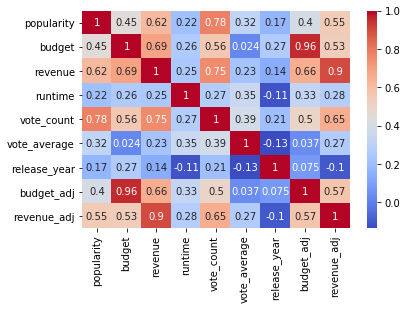

In [21]:
sns.heatmap(df_reg.corr(), cmap='coolwarm', annot=True)

Check the correlation budget_adj with revenue_adj with linear regression

In [22]:
X = df_reg['budget_adj']
Y = df_reg['revenue_adj']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result  = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            revenue_adj   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     1858.
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:12:40   Log-Likelihood:                -78673.
No. Observations:                3854   AIC:                         1.573e+05
Df Residuals:                    3852   BIC:                         1.574e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.535e+07   4.02e+06      3.820      0.000    7.47e+06    2.32e+07
budget_adj     2.7512      0.064     43.107      0.000       2.626       2.876
==============================================================================
Omnibus:                     3687.823   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           268871.998
Skew:                           4.433   Prob(JB):                         0.00
Kurtosis:                      42.947   Cond. No.                     8.85e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

check the correlation vote_count with revenue_adj with linear regression

In [23]:
X = df_reg['vote_count']
Y = df_reg['revenue_adj']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result  = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            revenue_adj   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     2890.
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:12:40   Log-Likelihood:                -78353.
No. Observations:                3854   AIC:                         1.567e+05
Df Residuals:                    3852   BIC:                         1.567e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.221e+07   3.07e+06     17.014      0.000    4.62e+07    5.82e+07
vote_count  1.608e+05   2991.141     53.754      0.000    1.55e+05    1.67e+05
==============================================================================
Omnibus:                     3000.989   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130639.725
Skew:                           3.320   Prob(JB):                         0.00
Kurtosis:                      30.739   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Check multiple regression correlation between revenue_adj with budget_adj and vote_count. Linear regression correlation uses two parameters namely budget_adj and vote_count greater than using only one of the two parameters. So, I will use multiple regression to predict revenue_adj

In [24]:
X = df_reg[['budget_adj', 'vote_count']]
Y = df_reg['revenue_adj']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result  = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            revenue_adj   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     1989.
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:12:40   Log-Likelihood:                -78064.
No. Observations:                3854   AIC:                         1.561e+05
Df Residuals:                    3851   BIC:                         1.562e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.84e+06   3.45e+06      1.114      0.265   -2.92e+06    1.06e+07
budget_adj     1.5676      0.063     24.939      0.000       1.444       1.691
vote_count   1.21e+05   3200.855     37.814      0.000    1.15e+05    1.27e+05
==============================================================================
Omnibus:                     3592.030   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           265030.646
Skew:                           4.231   Prob(JB):                         0.00
Kurtosis:                      42.735   Cond. No.                     8.88e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.88e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Change the data value of 0 to None in the data to be predicted. I will only try to predict data that only has budget_adj or revenue_adj has a value of 0 (budget_adj and revenue_adj are not both valued at 0).

In [25]:
df.loc[((df.budget_adj != 0) & (df.revenue_adj == 0)), 'revenue_adj'] = None

In [26]:
df[(df.budget_adj != 0) & (df.revenue_adj.isnull())].head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,gambling|bodyguard|remake,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,NaN
67,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,NaN


fill in revenue_adj data with regression results

In [27]:
def replace_revenue(data):
    if(np.isnan(data.revenue_adj)):
        return 1.5677 * data.budget_adj + 1.21e+05 * data.vote_count + 3.818e+06
    else:
        return data.revenue_adj

In [28]:
df['revenue_adj']= df.apply(replace_revenue, axis=1)

In [29]:
df[(df.budget_adj != 0) & (df.revenue_adj.isnull())].head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


Change the data value of 0 to None in the data to be predicted

In [30]:
df.loc[((df.budget_adj == 0) & (df.revenue_adj != 0)), 'budget_adj'] = None

In [31]:
df[(df.budget_adj.isnull()) & (df.revenue_adj != 0)].head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,NaN,2.700677e+07
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,NaN,2.056620e+07


multiple regression to predict the budget_adj column

In [32]:
X = df_reg[['vote_count', 'revenue_adj']]
Y = df_reg['budget_adj']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result  = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             budget_adj   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     1048.
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:12:41   Log-Likelihood:                -72530.
No. Observations:                3854   AIC:                         1.451e+05
Df Residuals:                    3851   BIC:                         1.451e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.623e+07   7.02e+05     37.338      0.000    2.48e+07    2.76e+07
vote_count    1.11e+04    873.497     12.703      0.000    9383.193    1.28e+04
revenue_adj     0.0887      0.004     24.939      0.000       0.082       0.096
==============================================================================
Omnibus:                     1232.877   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11749.757
Skew:                           1.244   Prob(JB):                         0.00
Kurtosis:                      11.184   Cond. No.                     3.09e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

fill in budget_adj data with regression results

In [33]:
def replace_budget(data):
    if(np.isnan(data.budget_adj)):
        return 0.0887 * data.revenue_adj + 1.11e+04 * data.vote_count + 2.623e+07
    else:
        return data.budget_adj

In [34]:
df['budget_adj'] = df.apply(replace_budget, axis=1)

Check whether the budget_adj column has been filled using prediction results

In [35]:
df[(df.budget_adj.isnull()) & (df.revenue_adj != 0)].head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [36]:
df[(df.budget_adj == 0) & (df.revenue_adj == 0)].shape

(4701, 16)

Replace the contents of the budget_adj and revenue_adj columns in the data where the budget_adj and revenue_adj columns are 0 to None. This is so the value is not included in the calculation, which can affect the results of the calculation.

In [37]:
df.loc[((df.budget_adj == 0) & (df.revenue_adj == 0)), ['budget_adj', 'revenue_adj']] = None

In [38]:
df['genres'] = df['genres'].fillna('Unknown')

<a id='eda'></a>
## Exploratory Data Analysis


### Which movie is the most popular?

In [39]:
df.sort_values('popularity',ascending=False)[['popularity', 'original_title']][:11]

,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent
631,12.971027,Captain America: The Winter Soldier
1329,12.037933,Star Wars
632,11.422751,John Wick
3,11.173104,Star Wars: The Force Awakens
633,10.739009,The Hunger Games: Mockingjay - Part 1


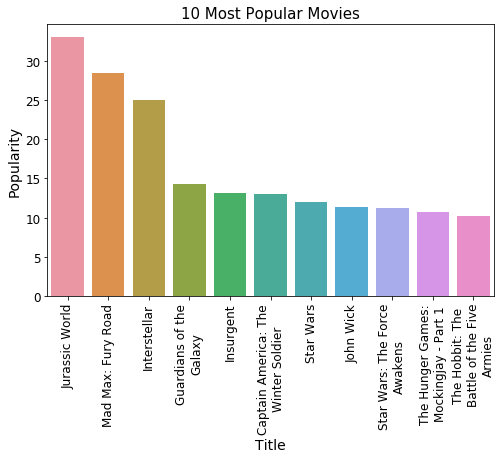

In [40]:
height = df.sort_values('popularity',ascending=False)[['popularity', 'original_title']][:11]
max_width = 20
plt.figure(figsize=(8, 5))
ax = sns.barplot(height.original_title, height.popularity)
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.ylabel('Popularity', size=14)
plt.xlabel('Title', size=14)
plt.title('10 Most Popular Movies', size=15);

> The most popular films based on data obtained are Jurassic World with a popularity of 33.0, then followed by Mad Max: Fury Road and Interstellar with popularity of 28.4 and 24.9, respectively

### Which genre has the highest average revenue?

In [41]:
df_genre = df.copy()

In [42]:
df_genre['genres'] = df_genre['genres'].astype(str)

see the maximum value from the genre count 

In [43]:
df_genre['genres'].str.split('|').str.len().max()

5

In [44]:
df_genre.head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


copy data df_genre to df1, df2, df3, df4, and df5

In [45]:
df1 = df_genre.copy()
df2 = df_genre.copy()
df3 = df_genre.copy()
df4 = df_genre.copy()
df5 = df_genre.copy()

In [46]:
df1['genres'] = df1['genres'].apply(lambda x: x.split('|')[0] if len(x.split('|')) >= 1 else None)
df2['genres'] = df2['genres'].apply(lambda x: x.split('|')[1] if len(x.split('|')) >= 2 else None)
df3['genres'] = df3['genres'].apply(lambda x: x.split('|')[2] if len(x.split('|')) >= 3 else None)
df4['genres'] = df4['genres'].apply(lambda x: x.split('|')[3] if len(x.split('|')) >= 4 else None)
df5['genres'] = df5['genres'].apply(lambda x: x.split('|')[4] if len(x.split('|')) == 5 else None)

add df2, df3, df4, df5 to df1

In [47]:
df_group = df1.append([df2, df3, df4, df5], ignore_index=True)

see the df_group shape

In [48]:
df_group.shape

(54325, 16)

delete rows that have empty data in the genres column

In [49]:
x = df_group[df_group.genres.isnull()].index
df_group.drop(x, inplace=True)

checking the results of data deletion

In [50]:
df_group[df_group.genres.isnull()].shape

(0, 16)

grouping data, looking for averages, and sorting data

In [51]:
top_revenue = df_group.groupby(df_group['genres']).mean()
top_revenue = top_revenue.sort_values('revenue_adj', ascending=False)

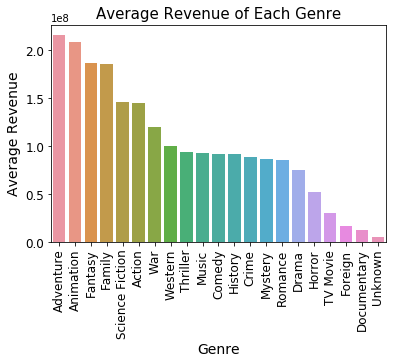

In [52]:
sns.barplot(top_revenue.index, top_revenue.revenue_adj);
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.ylabel('Average Revenue', size=14)
plt.xlabel('Genre', size=14)
plt.title('Average Revenue of Each Genre', size=15);

> Movie with adventure genre has the highest average revenue compared to all genres in the data. the highest average revenue after the adventure genre is the Animation genre.

### Which genre is popular from year to year?


I only need the release_year, genres and popularity columns, so I copy the 3 columns into a new variable

In [53]:
movie_trend = df_group[['release_year', 'genres', 'popularity']].copy()

Group data by column release_year and genre, then look for the average data

In [54]:
movie_trend = movie_trend.groupby(['release_year', 'genres'], as_index=False).mean()

In [55]:
movie_trend.head()

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346480
4,1960,Drama,0.566305


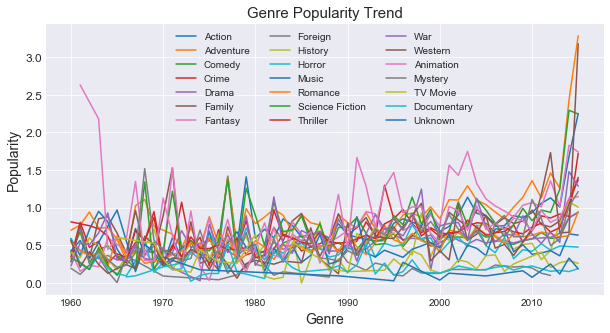

In [56]:
genres_unique = movie_trend.genres.unique()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 5))
for item in genres_unique:
    plt.plot(movie_trend[movie_trend['genres'] == item].release_year, 
             movie_trend[movie_trend['genres'] == item].popularity, label=item)
plt.legend(ncol= 3)
plt.yticks(size=12)
plt.ylabel('Popularity', size=14)
plt.xlabel('Genre', size=14)
plt.title('Genre Popularity Trend', size=15);

> Too many genres displayed. In addition, the data is too volatile to observe. So I will delete some genres and calculate moving averages so that data trends are more easily observed

grouping data by genre

In [57]:
movie_trend1 = movie_trend.groupby('genres', as_index=False).mean()

calculate the median

In [58]:
movie_trend1.median()

release_year    1987.981818
popularity         0.535108
dtype: float64

Select data that has an average popularity greater than the median

In [59]:
movie_trend1 = movie_trend1[movie_trend1.popularity > movie_trend1.popularity.median()]

In [60]:
movie_trend1.genres.unique()

array(['Action', 'Adventure', 'Animation', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Science Fiction', 'Thriller', 'War'], dtype=object)

see the unique value

In [61]:
movie_trend.genres.unique()

array(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western', 'Animation',
       'Mystery', 'TV Movie', 'Documentary', 'Unknown'], dtype=object)

In [62]:
movie_trend

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346480
4,1960,Drama,0.566305
...,...,...,...
1059,2015,TV Movie,0.260574
1060,2015,Thriller,1.401877
1061,2015,Unknown,0.187172
1062,2015,War,1.284511


In [63]:
movie_trend.shape

(1064, 3)

make a list that contains the genre to be analyzed

In [64]:
genre_unique = ['Action', 'Adventure', 'Animation', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Science Fiction', 'Thriller', 'War']

save data that has a genre that matches one of the genres in the genre_unique variable

In [65]:
movie_trend = movie_trend[movie_trend['genres'].isin(genre_unique)]

In [66]:
movie_trend.shape

(550, 3)

In [67]:
movie_trend.genres.unique()

array(['Action', 'Adventure', 'Crime', 'Family', 'Fantasy',
       'Science Fiction', 'Thriller', 'War', 'Animation', 'Mystery'],
      dtype=object)

In [68]:
movie_trend2 = movie_trend.copy()

In [69]:
movie_trend2.shape

(550, 3)

calculate the 25-year moving average from the popularity column

In [70]:
movie_trend2['mov_popularity'] = movie_trend2.sort_values(by=['release_year'], ascending=True)\
                                        .groupby('genres')['popularity']\
                                        .rolling(25).mean()\
                                        .reset_index(drop=True, level=0)

remove empty data

In [71]:
movie_trend2.dropna(inplace=True)

In [72]:
movie_trend2.shape

(310, 4)

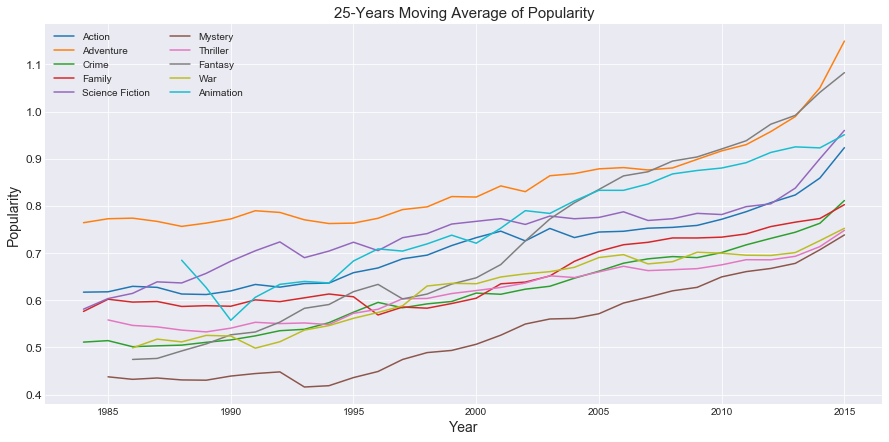

In [74]:
genre_unique = movie_trend2.genres.unique()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 7))
for item in genre_unique:
    plt.plot(movie_trend2[movie_trend2['genres'] == item].release_year, 
             movie_trend2[movie_trend2['genres'] == item].mov_popularity, label=item)
plt.legend(ncol=2)
plt.yticks(size=12)
plt.ylabel('Popularity', size=14)
plt.xlabel('Year', size=14)
plt.title('25-Years Moving Average of Popularity', size=15);

Overall popularity of the 10 genres above is seen increasing from year to year. The adventure genre is the most popular genre overall from year to year.

<a id='conclusions'></a>
## Conclusions

* The most popular films based on data obtained are Jurassic World with a popularity of 33.0
* Movie with adventure genre has the highest average revenue compared to all genres in the data.
* The adventure genre is the most popular genre overall from year to year.

Limitations :
* I use linear regression to predict empty data in the budget_adj and revenue_adj columns without reviewing the accuracy of the predicted results. Maybe you can calculate the accuracy of the prediction results and find a better prediction method than what I use.
* I only analyzed 10 genres when analyzing popular genres from year to year. You might be able to analyze without missing a single genre

References :
* https://datatofish.com/statsmodels-linear-regression/
* https://www.youtube.com/watch?v=U7D1h5bbpcs
* https://stackoverflow.com/questions/47953338/how-to-replace-values-of-selected-row-of-a-column-in-pandas-dataframe
* https://stackoverflow.com/questions/44097633/imputing-missing-values-using-a-linear-regression-in-python
* https://github.com/stephani-marcelli-djojo/udacity-data-analytics/blob/master/project-2-investigate-dataset/investigate-tmdb-movie-dataset.ipynb
* https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
* https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
* https://stackoverflow.com/questions/57144682/split-string-xticks-into-multiple-lines-matplotlib